In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

# Set index to datetime and fill NaN

In [36]:
df_original = pd.read_csv('Index2018.csv')
df = df_original.copy()
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df.set_index('date', inplace=True)
df = df.asfreq('b')
df = df.fillna(method='ffill')

# Modify index2018

In [37]:
df['market_value']  = df.spx
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

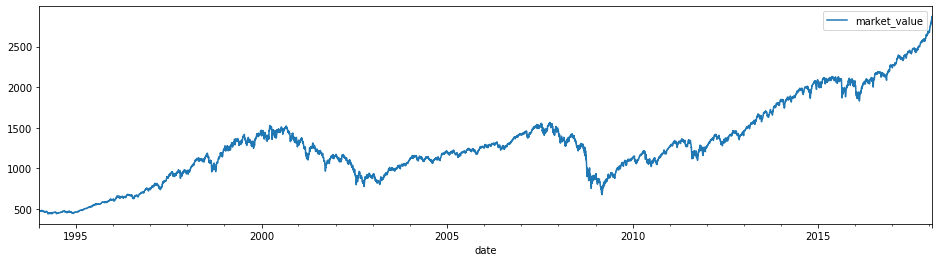

In [43]:
df.plot(figsize=(16,4))

In [46]:
train_size = int(len(df) * 0.8)
df_train, df_test = df.iloc[:train_size], df.iloc[train_size:]

# White noise

In [73]:
wn = np.random.normal(loc= df_train['market_value'].mean(), scale = df_train['market_value'].std(), size = len(df_train))
df_train['wn'] = wn

C:\Users\adbor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


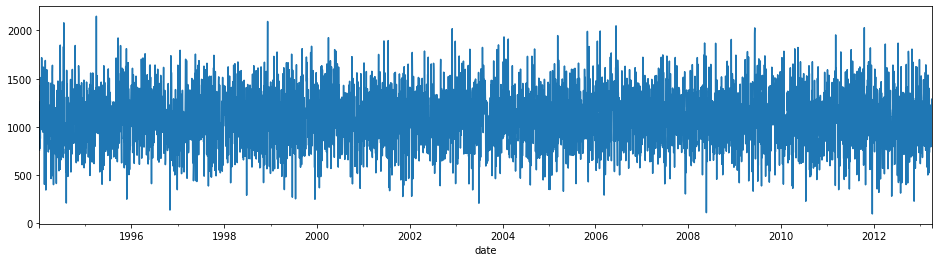

In [77]:
df_train.wn.plot(figsize=(16,4))

#  Random Walk

In [79]:
df_rw = pd.read_csv('RandomWalk.csv')

df_rw['date'] = pd.to_datetime(df_rw['date'], dayfirst = True)
df_rw.set_index('date', inplace=True)
df_rw = df_rw.asfreq('b')
df_rw = df_rw.fillna(method='ffill')
df_rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [81]:
df_train['rw'] = df_rw['price']

C:\Users\adbor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


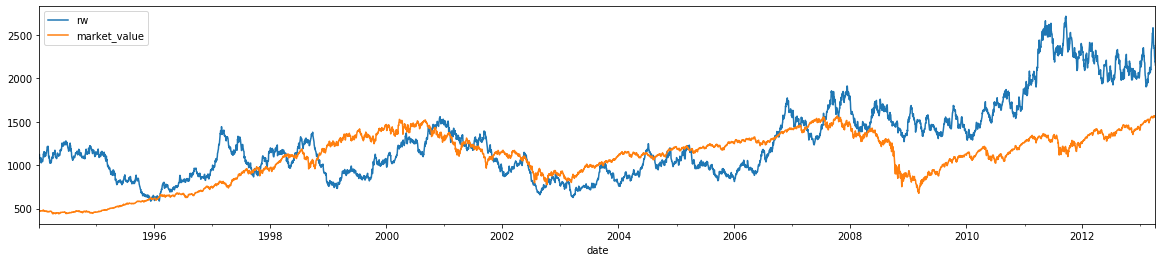

In [86]:
df_train[['rw','market_value']].plot(figsize=(20,4))

# Stacionarity

In [96]:
import statsmodels
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

In [111]:
(_,pvalue,_,_,_,_) = sts.adfuller(df_train.market_value)
print('Is not a stacionary time serie: ', pvalue > 0.1)

Is not a stacionary time serie:  True


In [99]:
sts.adfuller(df_train.wn)

(-70.51592564092311,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70820.21643453045)

In [100]:
sts.adfuller(df_train.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Stacionality

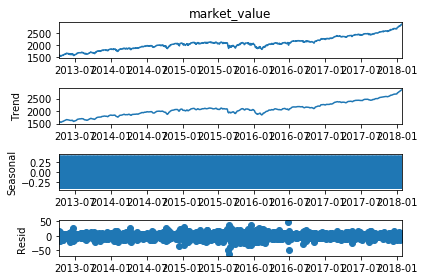

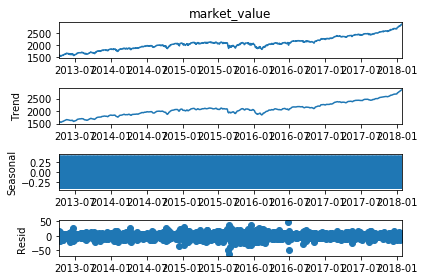

In [117]:
seasonal_decompose_aditiva = seasonal_decompose(df_test['market_value'], model='additive')
seasonal_decompose_aditiva.plot()

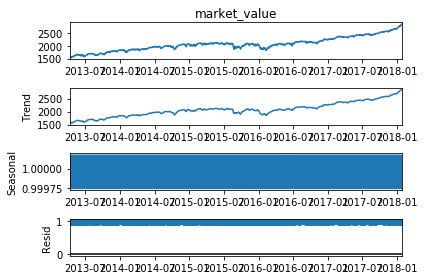

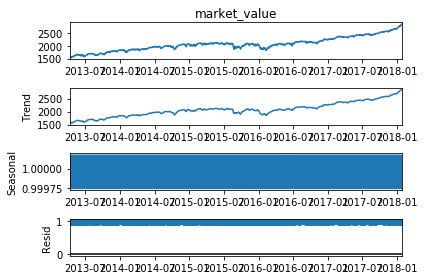

In [118]:
seasonal_decompose_aditiva = seasonal_decompose(df_test['market_value'], model='multiplicative')
seasonal_decompose_aditiva.plot()